Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Grafiek maken van hoeveel auto ongelukken per staat

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#test
#file_path = "C:\Users\Bart\Documents\Traineeship\Data2\US_Accidents_June20.csv"

#df = pd.read_csv('US_Accidents_June20.csv')







In [13]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

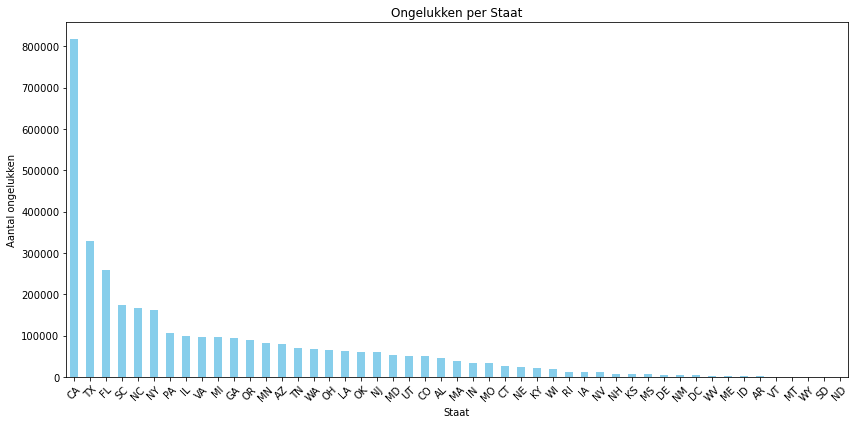

In [14]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



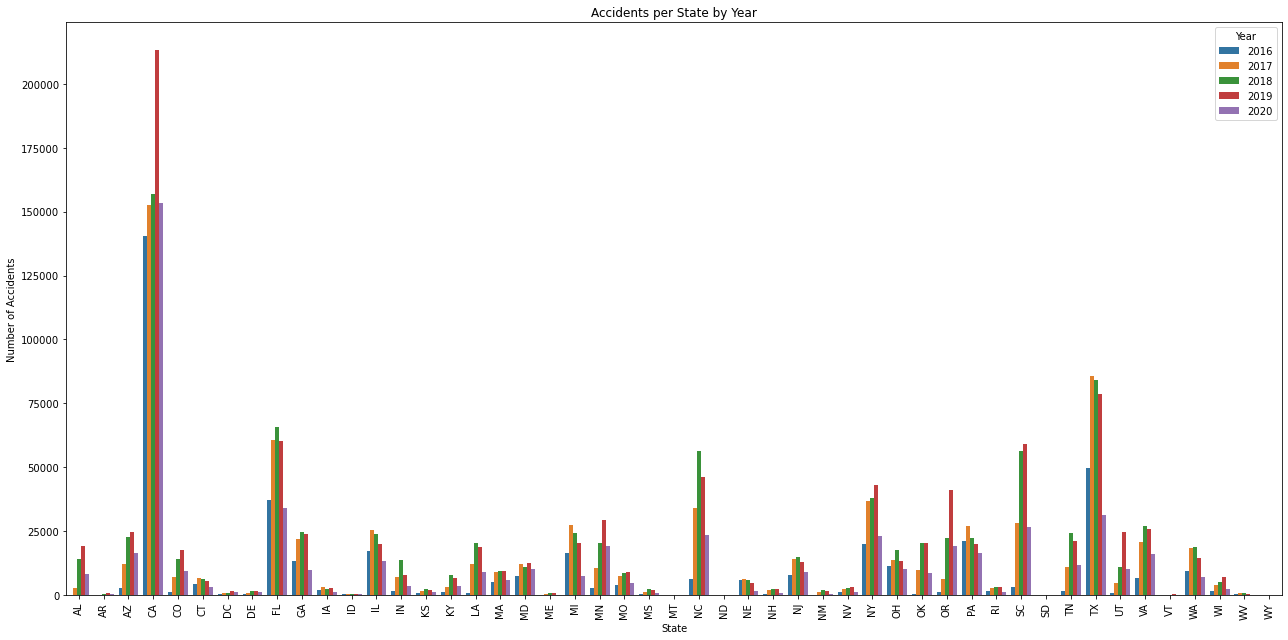

In [7]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_3500\1481016970.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


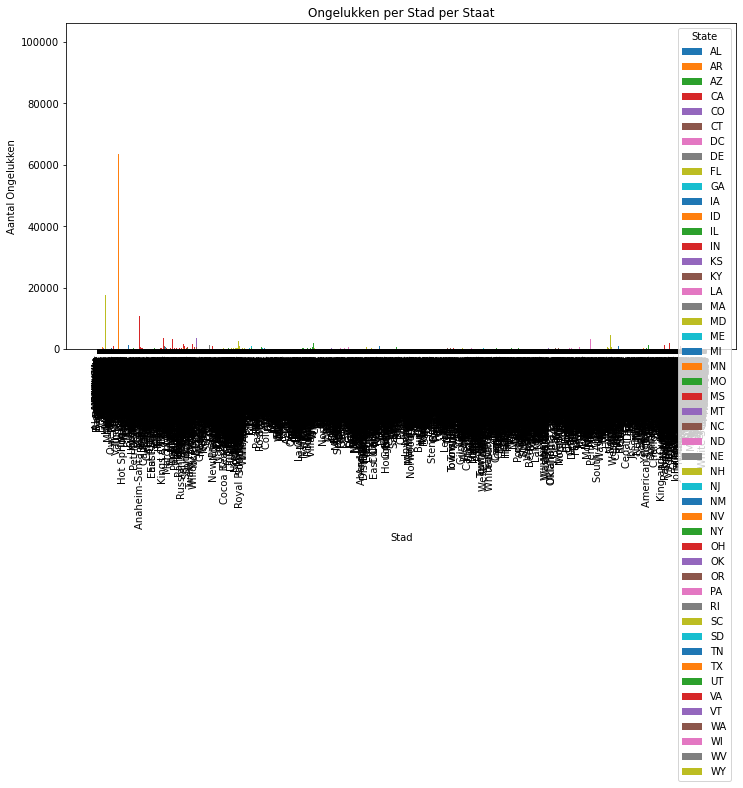

In [11]:
state_city_accident_counts = df.groupby(['State', 'City']).size().reset_index(name='accident_count')


plt.figure(figsize=(12, 6))
for state in state_city_accident_counts['State'].unique():
    state_data = state_city_accident_counts[state_city_accident_counts['State'] == state]
    plt.bar(state_data['City'], state_data['accident_count'], label=state)

plt.title('Ongelukken per Stad per Staat')
plt.xlabel('Stad')
plt.ylabel('Aantal Ongelukken')
plt.xticks(rotation=90) 
plt.legend(title='State', loc='upper right')
plt.tight_layout()
plt.show()

ff kijken of de ND ongelukken 0 of gewoon heel laag is

In [3]:
import pandas as pd

file_path = r"C:\Users\isabe\OneDrive\Documenten\WT\Bootcamp Specialisatie\Week 2-5\US_Accidents_June20.csv"

df = pd.read_csv(file_path)


nd_accidents = df[df['State'] == 'NY']


nd_accident_count = len(nd_accidents)


print(f"Aantal ongelukken in north dakota (ND): {nd_accident_count}")


Aantal ongelukken in north dakota (ND): 44


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [63]:
print(df.columns)
df['Wind_Direction'].unique()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', nan, 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [24]:
#print(df.columns)
d = df[df['State'] == 'CA']['City'].unique()
print(d[600:1100])
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL
#(Note: This appears twice, it should likely be St. Lucie) FL

#TX counties not all counties

['Mountain Center' 'Goleta' 'Idyllwild' 'Twin Peaks' 'Santa Paula'
 'Rimforest' 'La Palma' 'Winnetka' 'Vernon' 'La Habra' 'Signal Hill'
 'Claremont' 'Sun City' 'Montrose' 'Wrightwood' 'Sunland' 'Yucaipa'
 'Chino Hills' 'Jamul' 'El Segundo' 'Crestline' 'Rolling Hills Estates'
 'Tujunga' 'Thousand Oaks' 'Pinon Hills' 'Llano' 'Campo'
 'Capistrano Beach' 'Anza' 'Rancho Dominguez' 'Canoga Park' 'Los Alamitos'
 'Oak Hills' 'Venice' 'Lake Forest' 'Cedar Glen' 'Laguna Beach'
 'Aliso Viejo' 'Santa Rosa Valley' 'Angelus Oaks' 'Joshua Tree' 'Somis'
 'Midway City' 'San Marino' 'Playa del Rey' 'Temple City' 'Ranchita'
 'Sugarloaf' 'Maywood' 'La Habra Heights' 'Corona del Mar' 'Oak View'
 'Apple Valley' 'Redondo Beach' 'Hawaiian Gardens' 'Yucca Valley'
 'Whitewater' 'Blue Jay' 'Skyforest' 'Dulzura' 'Irwindale'
 'Palos Verdes Peninsula' 'Morongo Valley' 'Windsor Hills'
 'Point Mugu Nawc' 'Universal City' 'Poway' 'Bell' 'Bermuda Dunes'
 'West Hollywood' 'Lompoc' 'Borrego Springs' 'Warner Springs' 'Mt 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

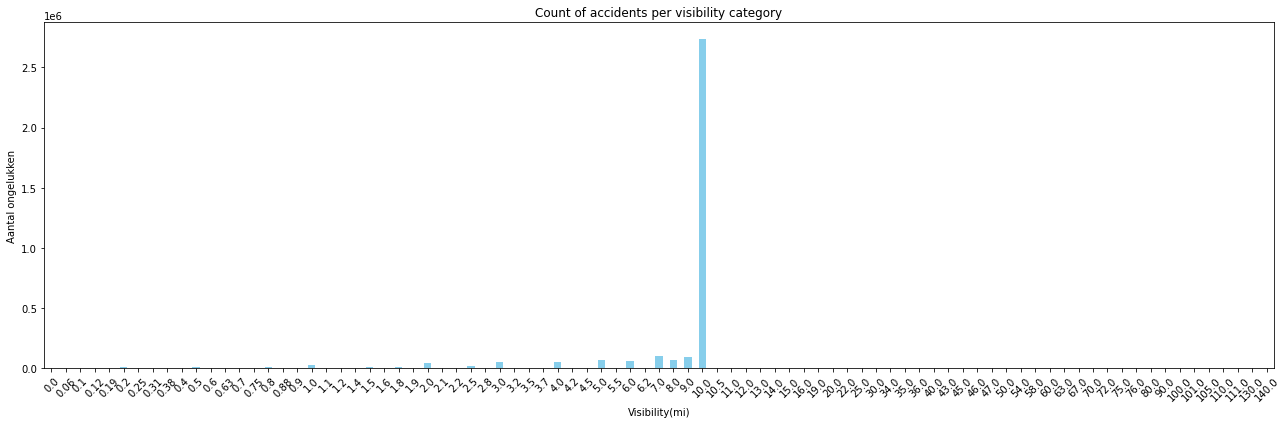

In [45]:
state_accident_counts = df['Visibility(mi)'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Count of accidents per visibility category')
plt.xlabel('Visibility(mi)')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

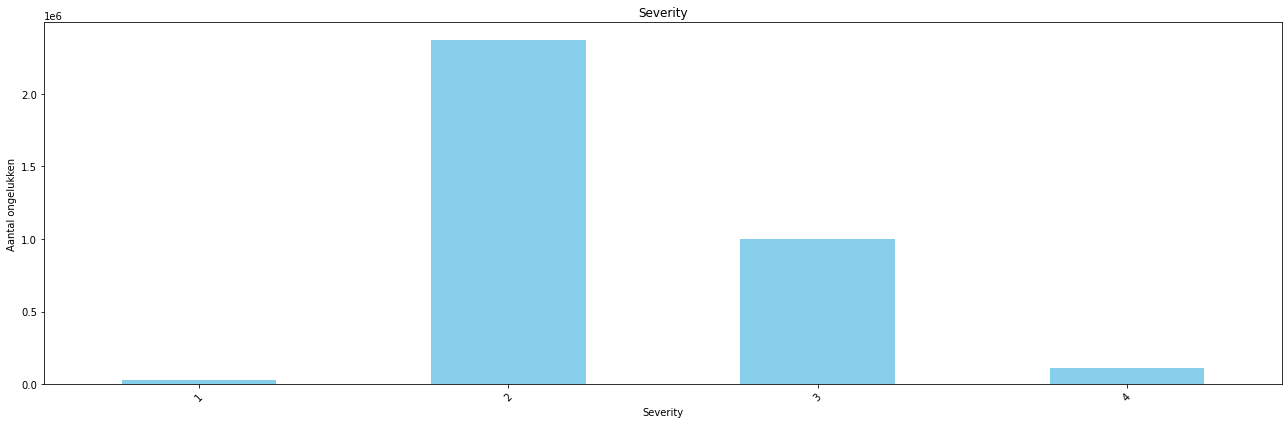

In [43]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

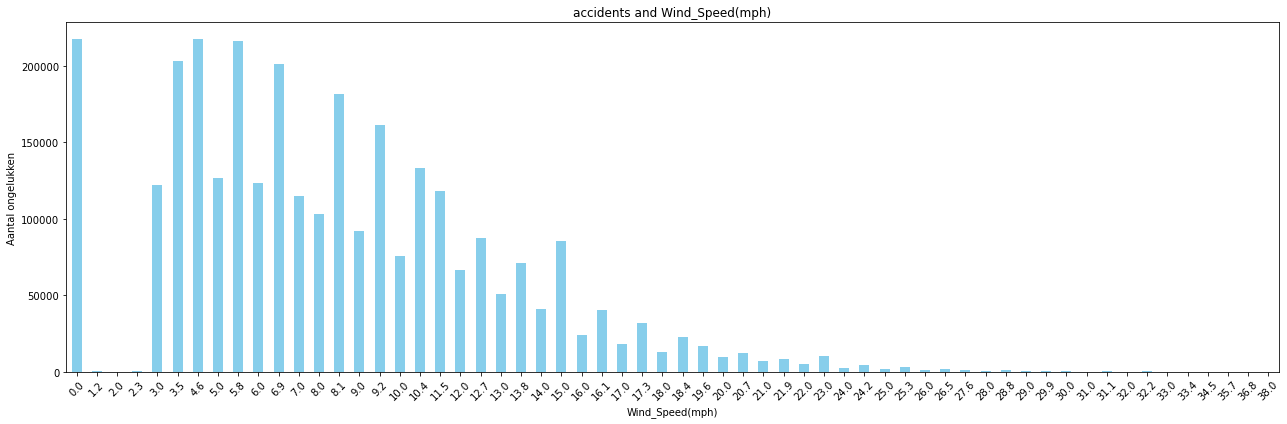

In [58]:
state_accident_counts = df['Wind_Speed(mph)'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and Wind_Speed(mph)')
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

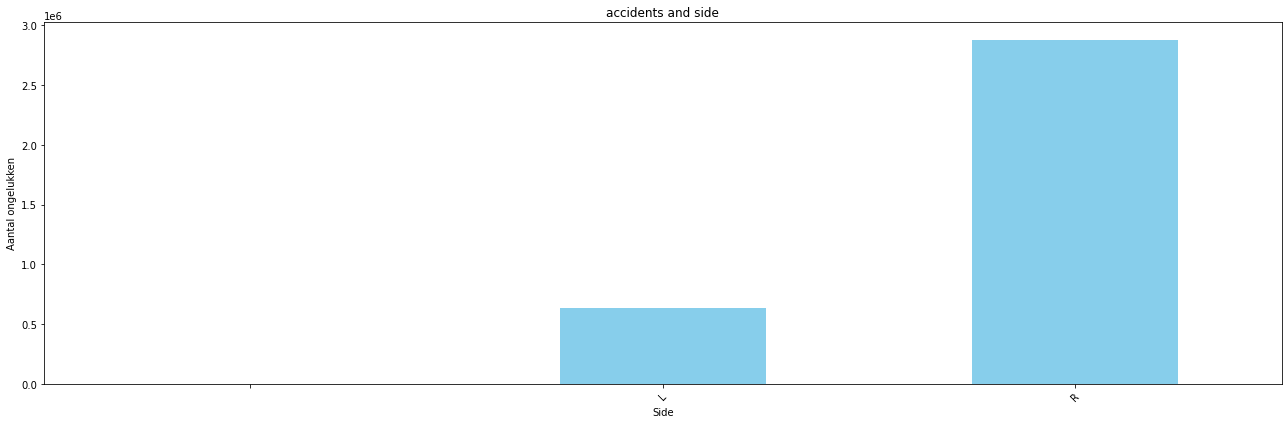

In [61]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

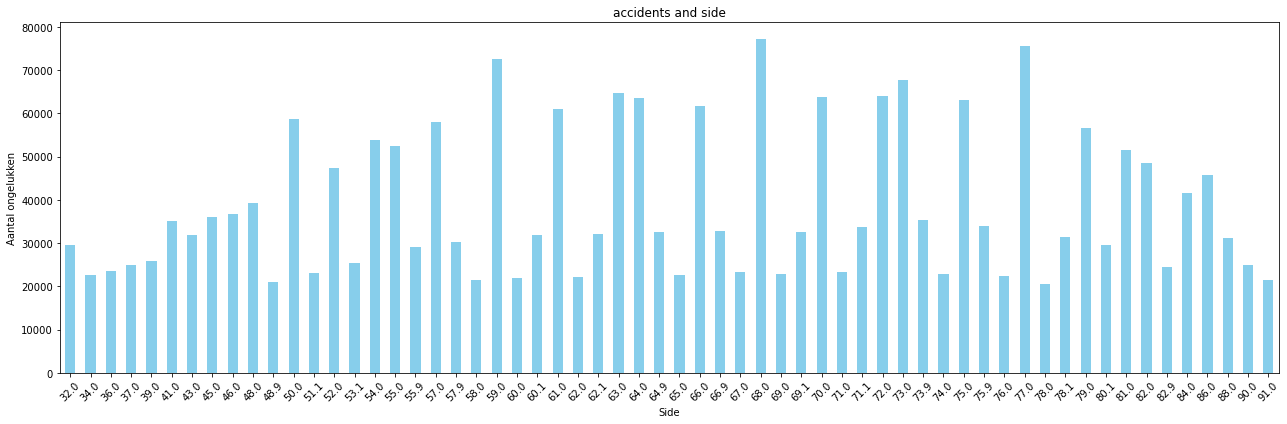

In [62]:
state_accident_counts = df['Temperature(F)'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()